<a href="https://colab.research.google.com/github/KaruraM/ANALYSIS/blob/main/HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_colwidth", 50)

In [ ]:
df = pd.read_csv("https://bit.ly/DSCoreAutolibDataset")
df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
D = pd.read_excel("https://bit.ly/DSCoreAutolibDatasetGlossary")
D

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
df.shape

(16085, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


There are no null values in the columns

In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


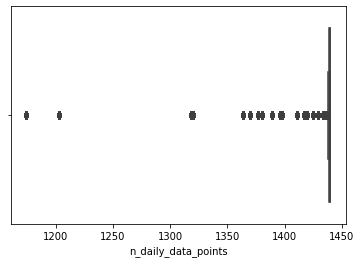

In [ ]:
# Detecting and dealing with outliers
sns.boxplot(df['n_daily_data_points'],data=df) 

In [ ]:
Q1 = df['n_daily_data_points'].quantile(0.25)
Q3 = df['n_daily_data_points'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
DataP_outliers = df[(df['n_daily_data_points'] < Q1 - whisker_width*IQR) | (df['n_daily_data_points'] > Q3 + whisker_width*IQR)]
DataP_outliers.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
23,75001,1/24/2018,1434,2,weekday,108,107,7,7,14,14,24,25
24,75001,1/25/2018,1398,3,weekday,130,130,0,0,4,4,20,20
25,75001,1/26/2018,1437,4,weekday,145,146,0,0,7,7,35,37


In [ ]:
df['n_daily_data_points'].median()

1440.0

In [ ]:
df1 = df["n_daily_data_points"].fillna(1440.0, inplace = True)

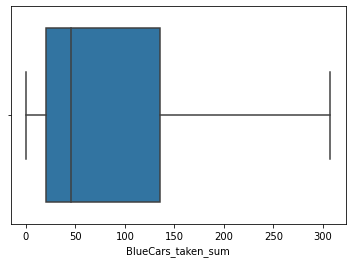

In [ ]:
sns.boxplot(df['BlueCars_taken_sum'],data=df)

In [ ]:
Q1 = df['BlueCars_taken_sum'].quantile(0.25)
Q3 = df['BlueCars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
BlueTaken_outliers = df[(df['BlueCars_taken_sum'] < Q1 - whisker_width*IQR) | (df['BlueCars_taken_sum'] > Q3 + whisker_width*IQR)]
BlueTaken_outliers.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum


In [ ]:
df['BlueCars_taken_sum'].median()

46.0

In [ ]:
df1 = df["BlueCars_taken_sum"].fillna(46.0, inplace = True)

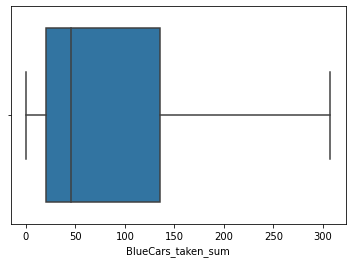

In [ ]:
sns.boxplot(df['BlueCars_taken_sum'],data=df) # No more outliers

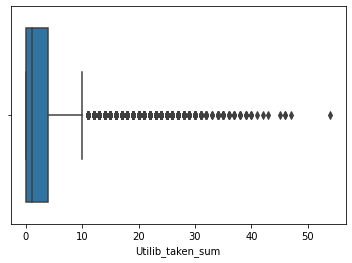

In [ ]:
sns.boxplot(df['Utilib_taken_sum'],data=df)

In [ ]:
Q1 = df['Utilib_taken_sum'].quantile(0.25)
Q3 = df['Utilib_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Utilib_outliers = df[(df['Utilib_taken_sum'] < Q1 - whisker_width*IQR) | (df['Utilib_taken_sum'] > Q3 + whisker_width*IQR)]
Utilib_outliers.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
79,75001,3/24/2018,1440,5,weekend,196.0,196,11,11,13,13,27,27
114,75001,4/28/2018,1440,5,weekend,159.0,159,11,11,5,5,27,27
135,75001,5/30/2018,1440,2,weekday,119.0,118,17,17,5,5,21,22
197,75002,2/11/2018,1440,6,weekend,197.0,205,13,13,9,9,35,36
274,75002,5/2/2018,1440,2,weekday,150.0,141,18,18,10,10,38,40


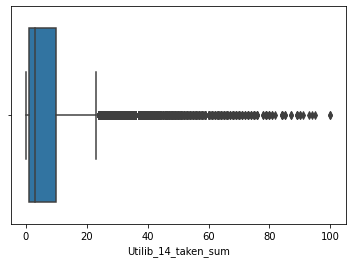

In [ ]:
sns.boxplot(df['Utilib_14_taken_sum'],data=df)

In [ ]:
df['Utilib_taken_sum'].mean()

3.69829033260802

In [ ]:
df1 = df["Utilib_taken_sum"].fillna(3.7, inplace = True)

**Univariate**

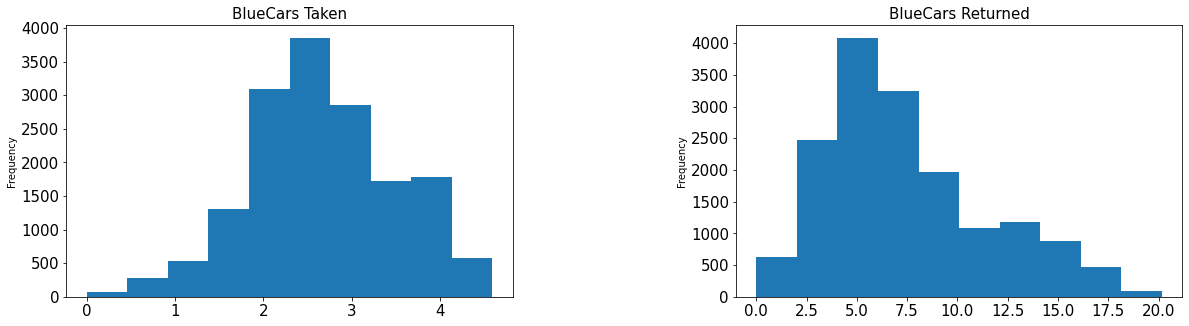

In [18]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

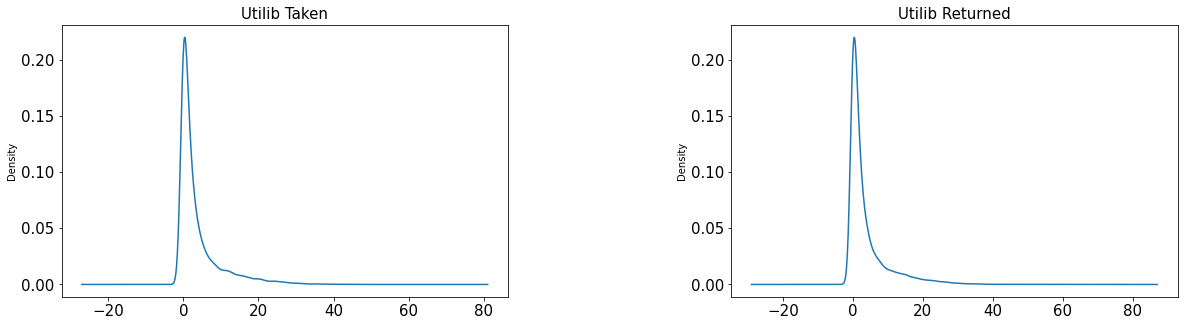

In [19]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['Utilib_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("Utilib Taken", fontsize=15)
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


The distributions are highly skewed

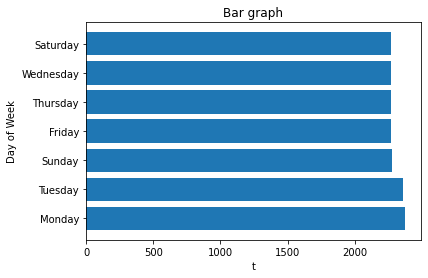

In [22]:
labels=['Monday','Tuesday','Sunday','Friday','Thursday','Wednesday','Saturday']
plt.barh(labels , df['dayOfWeek'].value_counts())
plt.ylabel("Day of Week")
plt.xlabel("t")
plt.title("Bar graph")
plt.show()

**Bivariate**

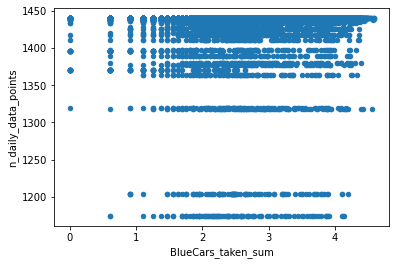

In [20]:
df.plot(kind='scatter',x='BlueCars_taken_sum',y='n_daily_data_points')
plt.show()

There is no correlation

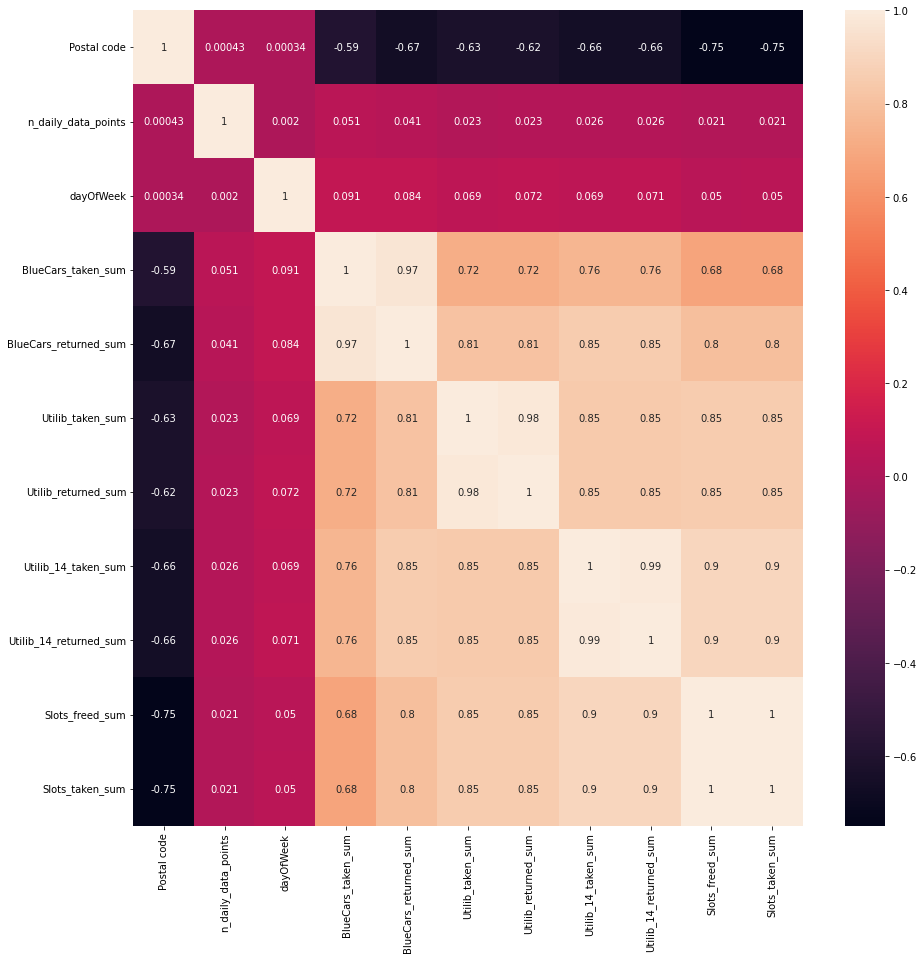

In [23]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

The taken and return variables are highly correlated

### **REPORT**

**Problem Statement**

Autolib electric car-sharing service company manages the all_electric bluecars.The formulated hypothesis states that bluecars are used more on weekends than weekdays. Hypothesis test is vital to do away with type I and type II errors and also assess the blue car usage throughout the week for better functioning of the company. Knowing which days have more bluecar records will help in also assessing the specific areas and improve customer satisfaction and in the longrun more clients.

**Ho:** Bluecars are used more on weekends than weekdays

**Ha**: Bluecars are used more on weekdays than weekends

### **Data Description**

The number of bluecars per day of the week is the random variable.
https://bit.ly/DSCoreAutolibDataset is our data source and this is the link with the variable definitions; https://bit.ly/DSCoreAutolibDatasetGlossary.
Auto_lib_daily_events_postal_code.csv.

### **Hypothesis Testing Procedure**

alpha level = 0.05 (It is a fixed probability of wrongly rejecting a True Null Hypothesis) 

p < 0.05 When the critical value is less than 0.05, there's a 5% chance that the data is random with 95% chance that the data is significant.

We will be using the t test

**Testing for normality**








**Ho**: The data was drawn from a Normally Distributed Population

**Ha**: The data was not drawn from a normally distributed population.

In [4]:
from scipy import stats
# We'll use the Shapiro Wilk Test
shapiro_test = stats.shapiro(df.BlueCars_taken_sum)
shapiro_test

ShapiroResult(statistic=0.661232590675354, pvalue=0.0)

The P-value is < 0.05 we reject the null hypothesis and conclude that the the Data was not drawn from a Normal Distribution

We can either normalize the data or carry out Non Parametric tests on the Data.

In [10]:
from scipy.special import boxcox1p
df.BlueCars_taken_sum = boxcox1p(df.BlueCars_taken_sum,0.25)

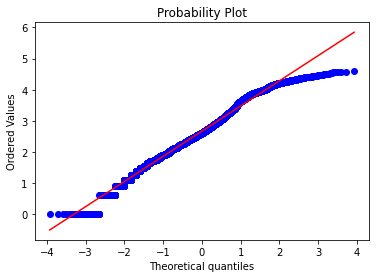

In [11]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df.BlueCars_taken_sum, plot = plt)
plt.show()

In [12]:
from scipy.special import boxcox1p
df.BlueCars_returned_sum = boxcox1p(df.BlueCars_returned_sum,0.25)

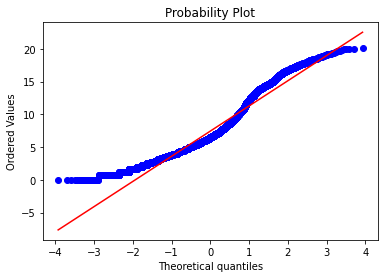

In [13]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df.BlueCars_returned_sum, plot = plt)
plt.show()

In [15]:
# 2 sample t-test
a= np.array(df.BlueCars_taken_sum)
b = np.array(df.BlueCars_returned_sum)

In [16]:
df.BlueCars_returned_sum.describe() ,df.BlueCars_taken_sum.describe()

(count    16085.000000
 mean         7.445457
 std          3.964776
 min          0.000000
 25%          4.562781
 50%          6.473322
 75%          9.659812
 max         20.169492
 Name: BlueCars_returned_sum, dtype: float64, count    16085.000000
 mean         2.672141
 std          0.812532
 min          0.000000
 25%          2.143035
 50%          2.613607
 75%          3.227654
 max          4.589126
 Name: BlueCars_taken_sum, dtype: float64)

In [ ]:
# Making a decision

In [ ]:
# Decision Interpretation